In [30]:
import sys
!{sys.executable} -m pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


# SCDM Updates 07/07/20 by Peace Kotamnives

## QE inputs :
### Energy cutoff plan-wave = 85 Ry 
### Pseudo potentials = O_HSCV_PBE-1.0.UPF and H_HSCV_PBE-1.0.UPF


### Water2
#### cell size = 20.000 Ang  
#### FFT dimensions = 225x225x225  
#### PW = 714383
#### Dense grid = 5715789 G-vectors 


### Water64
#### cell size = 12.417 Ang
#### FFT dimensions = 144x144x144 
#### PW = 170901
#### Dense grid = 1367449 G-vectors 

<IPython.core.display.Javascript object>


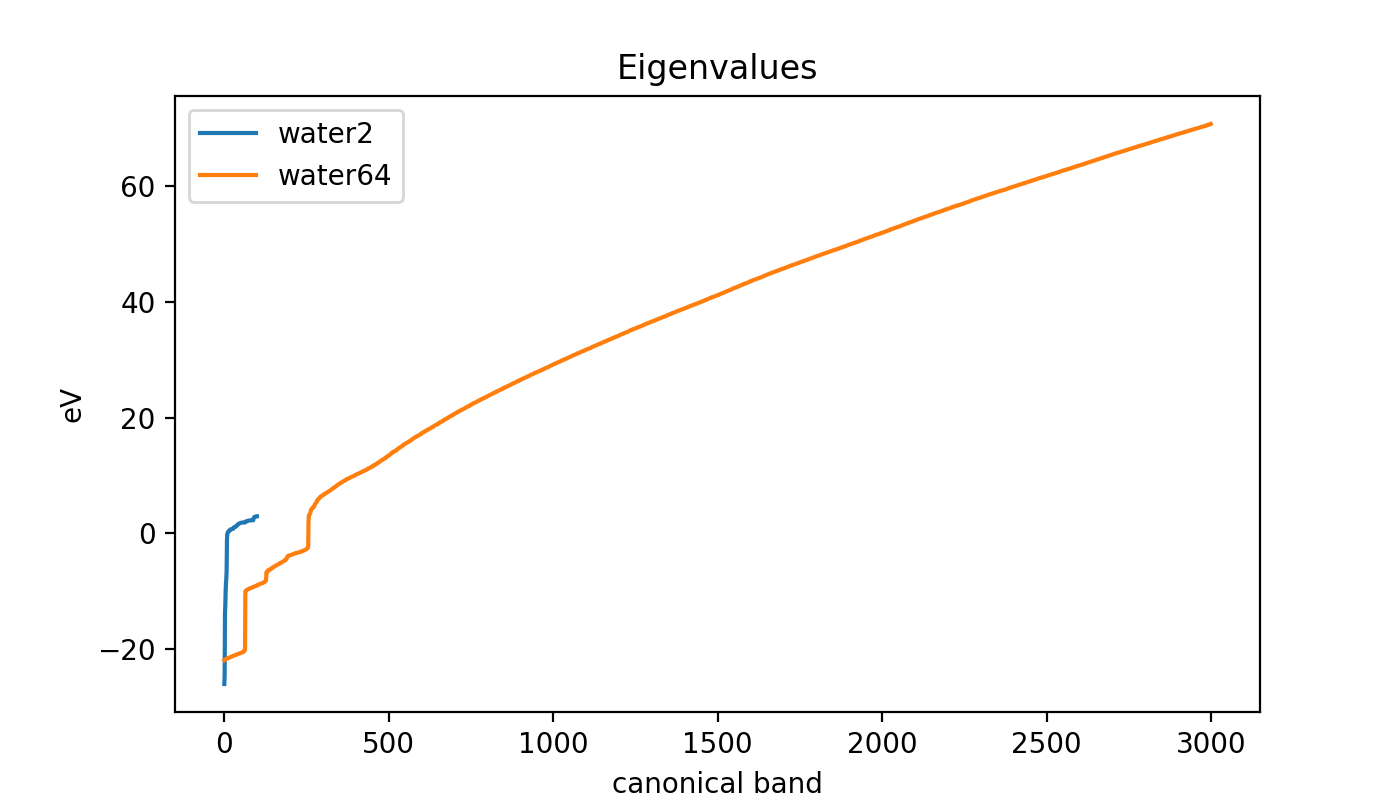

Text(0, 0.5, 'eV')

In [27]:
import numpy as np
from scipy import linalg 
import glob, os
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
mpld3.enable_notebook()


eig_water2 =  open('water2.eig','r')
lines = eig_water2.readlines()
D_water2 = []
for line in lines:
    orbt_info = np.asarray(line.split()[0:3],dtype='float')
    D_water2.append(orbt_info[-1])
eig_water2.close()

eig_water64 =  open('water64.eig','r')

lines = eig_water64.readlines()
D_water64 = []
for line in lines:
    orbt_info = np.asarray(line.split()[0:3],dtype='float')
    D_water64.append(orbt_info[-1])
eig_water64.close()

plt.figure(1)
plt.rcParams["figure.figsize"] = [7,4]
plt.plot(D_water2,label='water2')
plt.plot(D_water64,label='water64')
plt.legend()
plt.title('Eigenvalues')
plt.xlabel('canonical band')
plt.ylabel('eV')

<IPython.core.display.Javascript object>


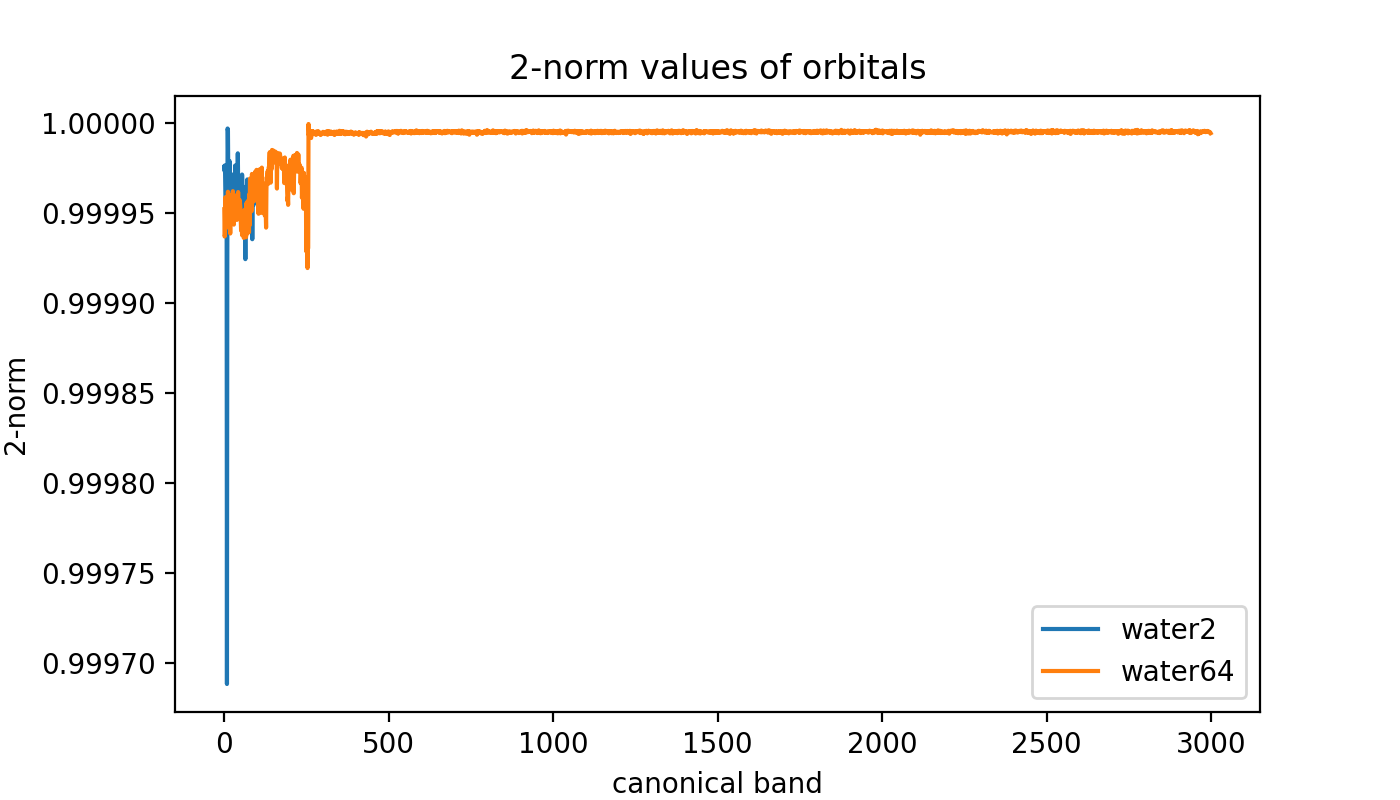

Text(0, 0.5, '2-norm')

In [28]:
norms_water2 =  np.load('obtl_norm_water2_nbd100.npy')
norms_water64 =  np.load('obtl_norm_water64_nbd3000.npy')

plt.figure(3)
plt.plot(abs(norms_water2),label='water2')
plt.plot(abs(norms_water64),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('2-norm values of orbitals')
plt.xlabel('canonical band')
plt.ylabel('2-norm')

<IPython.core.display.Javascript object>


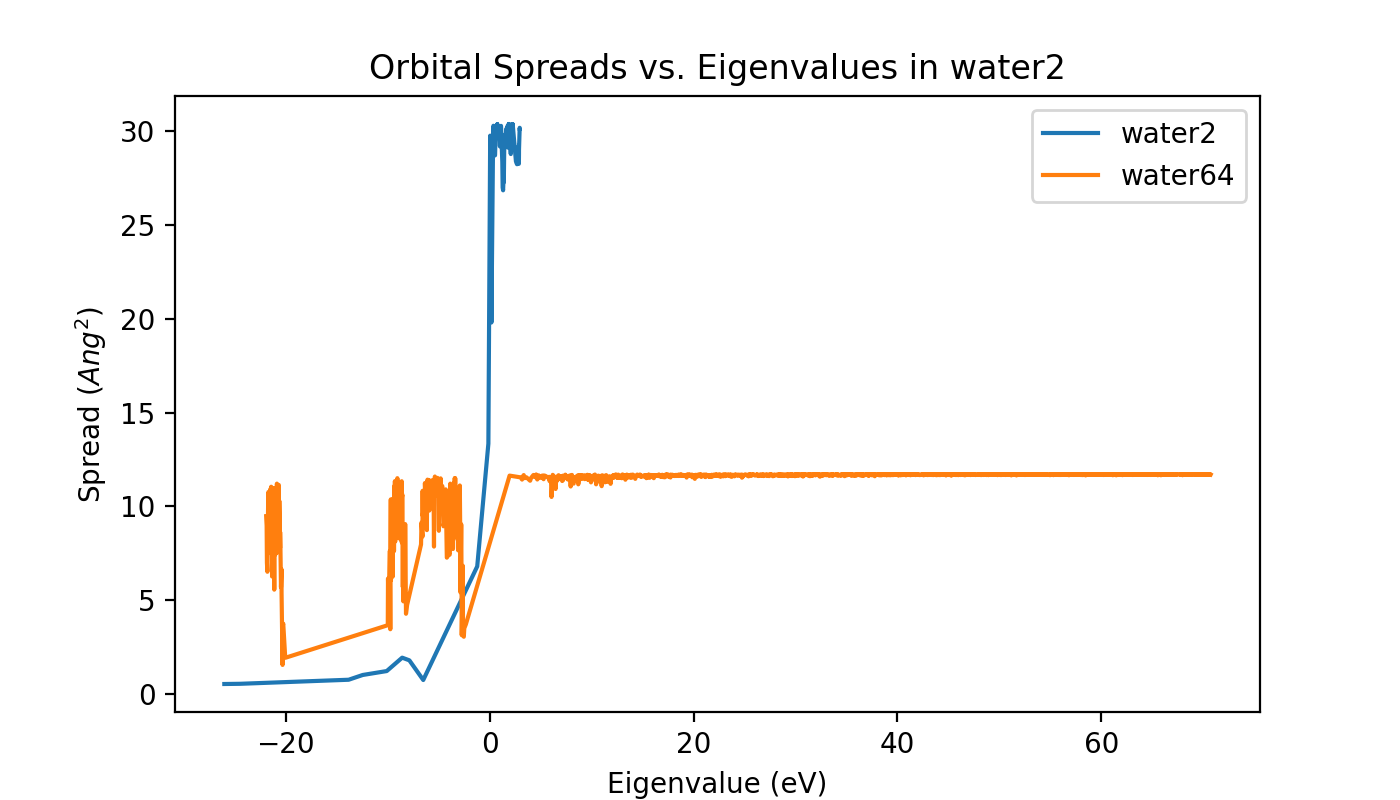

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [24]:
Omegas2_psi = np.load('unsorted_obtl_spread_psi_dim_100_water2.npy')
Omegas64_psi = np.load('unsorted_obtl_spread_psi_dim_3000_water64.npy')

plt.figure(5)
plt.plot(D_water2,Omegas2_psi,label='water2')
plt.plot(D_water64,Omegas64_psi,label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Orbital Spreads vs. Eigenvalues')
plt.xlabel('Eigenvalue (eV)')
plt.ylabel('Spread ($Ang^{2}$)')

<IPython.core.display.Javascript object>


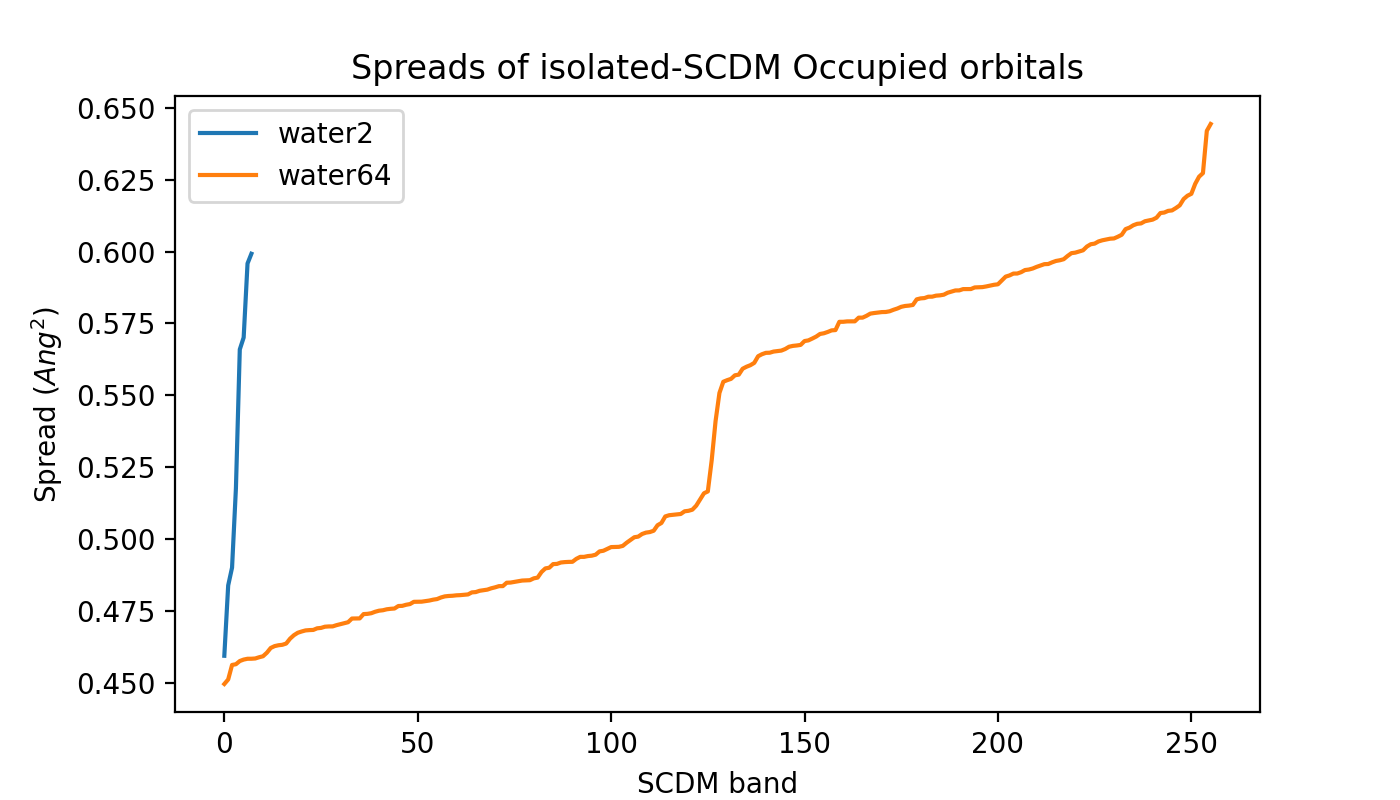

<IPython.core.display.Javascript object>


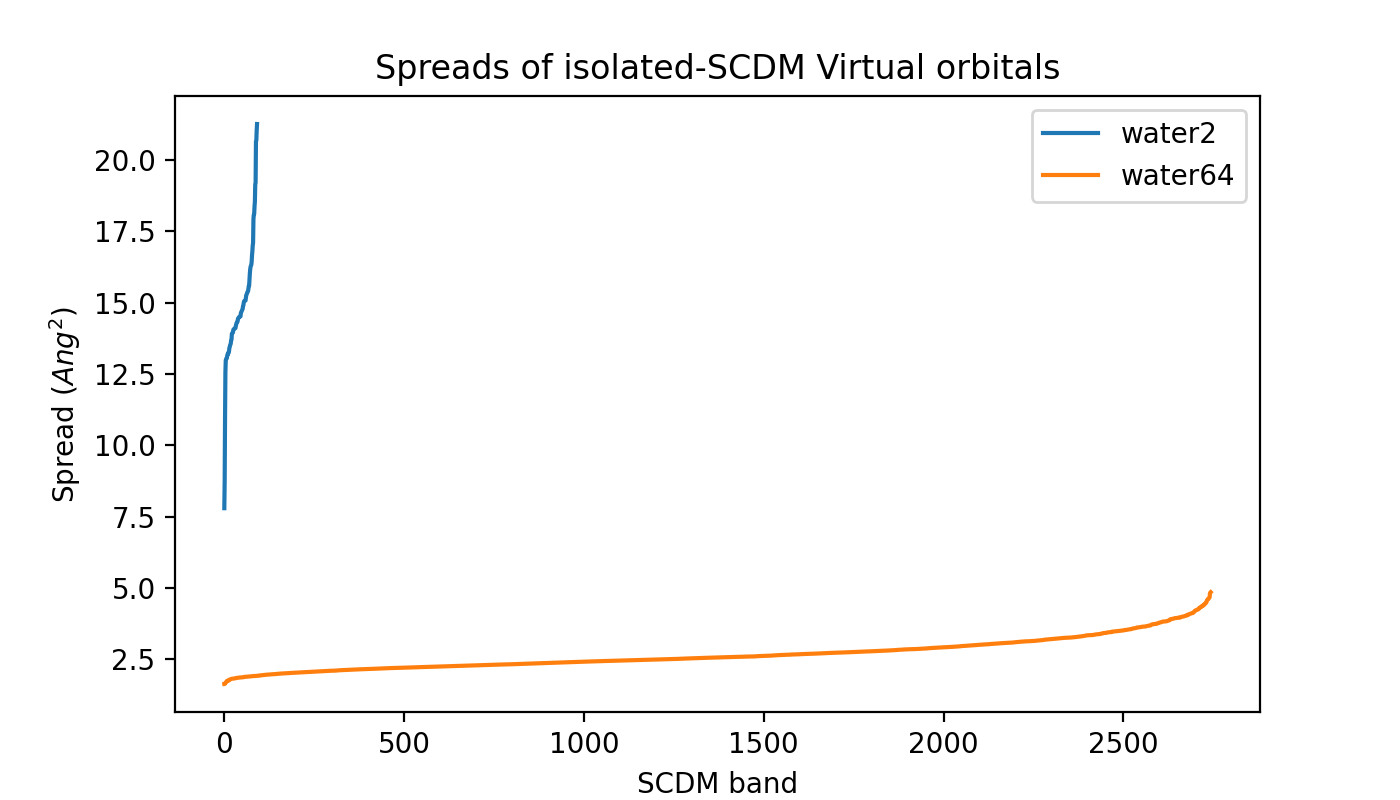

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [26]:
Omegas2_phiocc = np.load('unsorted_obtl_spread_scdm_phi_dim_8_occ_water2.npy')
Omegas2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_92_virt_water2.npy')
Omegas64_phiocc = np.load('unsorted_obtl_spread_scdm_phi_dim_256_occ_water64.npy')
Omegas64_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2744_virt_water64.npy')

plt.figure(6)
plt.plot(sorted(Omegas2_phiocc),label='water2')
plt.plot(sorted(Omegas64_phiocc),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of isolated-SCDM Occupied orbitals')
plt.xlabel('SCDM band')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(7)
plt.plot(sorted(Omegas2_phivirt),label='water2')
plt.plot(sorted(Omegas64_phivirt),label='water64')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of isolated-SCDM Virtual orbitals')
plt.xlabel('SCDM band')
plt.ylabel('Spread ($Ang^{2}$)')